### Barplot representing monthly water consumption, as a result of the following specifications given by the user: year, time period (StartMonth,EndMonth) and park identification.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

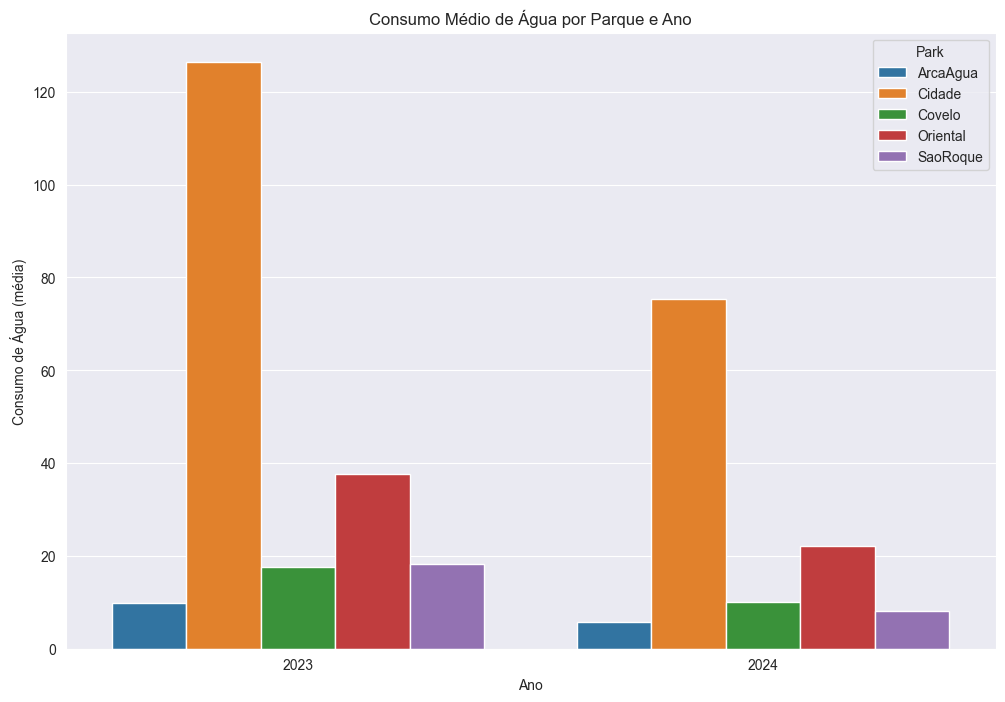

In [1]:
# Carregar os dados do arquivo CSV
dados = pd.read_csv('Datasets_for_US09_US10_and_US11_20240421/water_consumption.csv', delimiter=';')

# Converter a coluna 'Consumption' para float
dados['Consumption'] = dados['Consumption'].str.replace(',', '.').astype(float)

# Agrupar os dados por parque e ano e calcular a média de consumo
dados_agrupados = dados.groupby(['Park', 'Year']).agg({'Consumption': 'mean'}).reset_index()

# Criar um gráfico de barras para cada parque mostrando a média de consumo de água por ano
plt.figure(figsize=(12, 8))
sns.barplot(x='Year', y='Consumption', hue='Park', data=dados_agrupados)

# Configurar o título e labels
plt.title('Consumo Médio de Água por Parque e Ano')
plt.xlabel('Ano')
plt.ylabel('Consumo de Água (média)')

# Exibir o gráfico
plt.show()


## Average of monthly costs related to water consumption
- for each park, as a result of the following specifications given by the user: number of parks to be analyzed, and park identification.

In [ ]:
df = pd.read_csv('Datasets_for_US09_US10_and_US11_20240421/water_consumption.csv', sep=';', decimal=',')
parks = list(df["Park"].unique())
nParks = int(input("How many parks do you want to analyze:"))
parkNames = []
for n in range(0,nParks):
  choice = input("Input park name:")
  if choice not in parks:
    raise ValueError("Park name not in data file!")
  parkNames.append(choice)
datasets = []
for pn in parkNames:
  # Get years for which there are metrics
  dataYears = list(df.query("Park == @pn")["Year"].unique())
  for dy in dataYears:
    print(pn + " - " + str(dy))
    meanForPark = df.query("Park == @pn and Year == @dy").groupby("Month").mean("Consumption")["Consumption"]
    print(meanForPark)
    datasets.append(meanForPark)

## Consider the water consumption of every day that is recorded. 
- The aim is to analyze and compare statistical indicators between the park with the highest and lowest (not null) water consumption.
- For these two parks, perform the following tasks and compare results:

### Calculate the mean, median, standard deviation, and the coefficient of skewness

### Build relative and absolute frequency tables (classified data), considering 5 classes;

In [7]:
import pandas as pd
import numpy as np

data = pd.read_csv('Datasets_for_US09_US10_and_US11_20240421/water_consumption.csv', delimiter=';')

data['Consumption'] = data['Consumption'].str.replace(',', '.').astype(float)

grouped_data = data.groupby(['Park', 'Year', 'Month'])

monthly_consumption = grouped_data['Consumption'].sum()

# Calculate daily water Consumption
def calculate_cost(row):
    
    park, year, month = row['Park'], row['Year'], row['Month']
    consumption = row['Consumption']
    
    total_monthly_consumption = monthly_consumption[(park, year, month)]

    total_monthly_consumption = float(total_monthly_consumption)
    
    if total_monthly_consumption <= 1000:
        cost = consumption * 0.7
    else:
        cost = consumption * 0.7 * 1.15
    
    return cost

data['Cost'] = data.apply(calculate_cost, axis=1)

# Define 5 classes based on the cost column 
data['Cost_Class'] = pd.cut(data['Cost'], bins=5)

# Calculte absolute and relative frequency tables
absolut_freq = data['Cost_Class'].value_counts().sort_index()
relative_freq = data['Cost_Class'].value_counts(normalize=True).sort_index()

print("Absolute Frequency Table")
print(absolut_freq)

print("\nRelative Frequency Table")
print(relative_freq)


Absolute Frequency Table
Cost_Class
(-0.743, 148.547]     2124
(148.547, 297.095]      68
(297.095, 445.642]       2
(445.642, 594.19]        0
(594.19, 742.737]        1
Name: count, dtype: int64

Relative Frequency Table
Cost_Class
(-0.743, 148.547]     0.967654
(148.547, 297.095]    0.030979
(297.095, 445.642]    0.000911
(445.642, 594.19]     0.000000
(594.19, 742.737]     0.000456
Name: proportion, dtype: float64


### For each park, check if the data has outliers, using the outlier definition as values that deviate from the median by more than 1.5 times the interquartile range;

### Graphically represent data through histograms with 10 and 100 classes.

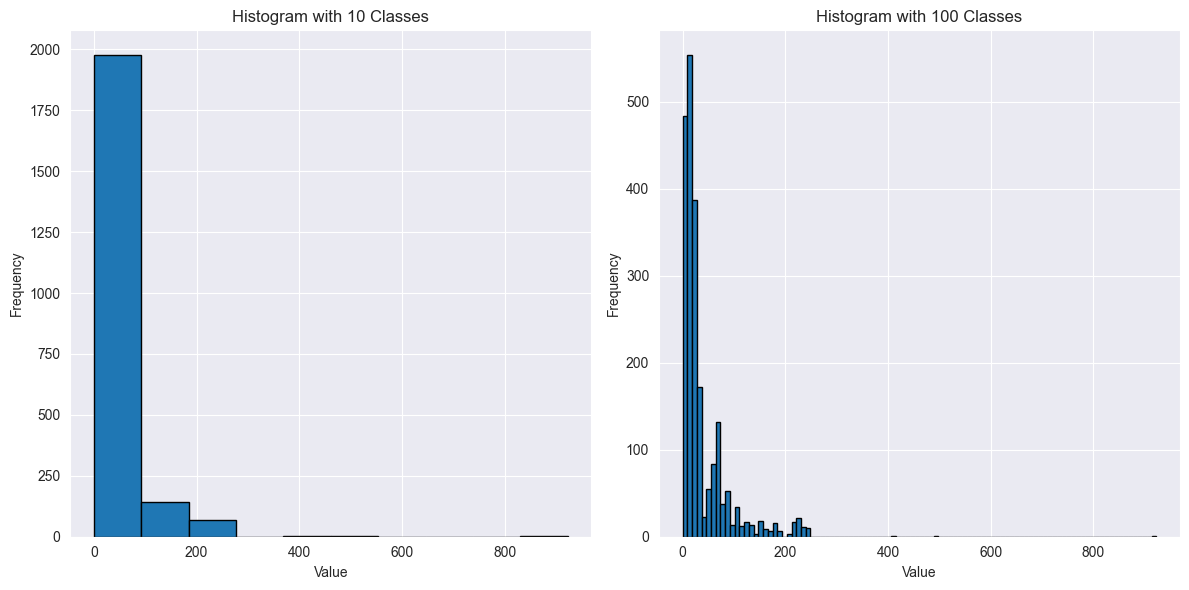

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the data from a CSV file
data = pd.read_csv('Datasets_for_US09_US10_and_US11_20240421/water_consumption.csv', delimiter=';')

# Convert the 'Consumption' column from string to float
data['Consumption'] = data['Consumption'].str.replace(',', '.').astype(float)

# Create a figure with two subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram with 10 bins
ax[0].hist(data['Consumption'], bins=10, edgecolor='black')
ax[0].set_title('Histogram with 10 Classes')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Frequency')

# Histogram with 100 bins
ax[1].hist(data['Consumption'], bins=100, edgecolor='black')
ax[1].set_title('Histogram with 100 Classes')
ax[1].set_xlabel('Value')
ax[1].set_ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()
